# BiLSTM Model Evaluation
This notebook demonstrates the comprehensive evaluation features of the BiLSTM model for spam detection.

In [1]:
import os
import random

import numpy as np
import pandas as pd
import torch

from models.bilstm import BiLSTMSpam
from utils.functions import load_glove_embeddings, build_vocab

In [2]:
ROOT_PATH = '../'
DATA_PATH = os.path.abspath(os.path.join(ROOT_PATH, '../spam-detection-data/'))
DATA_PATH

'/home/michael/PycharmProjects/spam-detection-data'

In [3]:
GLOVE_PATH = os.path.join(DATA_PATH, 'data/raw/glove.6B/glove.6B.300d.txt')
GLOVE_PATH

'/home/michael/PycharmProjects/spam-detection-data/data/raw/glove.6B/glove.6B.300d.txt'

In [4]:
# Load the data
train_df = pd.read_pickle(DATA_PATH + '/data/processed/train.pkl')
test_df = pd.read_pickle(DATA_PATH + '/data/processed/test.pkl')

In [5]:
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [6]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'
# torch.cuda.empty_cache()  # Clear any existing allocations
device

device(type='cuda')

In [7]:
# Build vocabulary and load embeddings
set_seed(42)
word2idx, idx2word = build_vocab(train_df['text'])
embedding_dim = 300
max_len = 200

In [8]:
pretrained_embeddings = load_glove_embeddings(GLOVE_PATH, word2idx, embedding_dim)

In [9]:
# Load the trained BiLSTM model
model_path = DATA_PATH + '/trained_models/best_bilstm_model.pt'
model = BiLSTMSpam(vocab_size=len(word2idx), embedding_dim=embedding_dim,
                   pretrained_embeddings=pretrained_embeddings)
model.load(model_path)
model = model.to(device)
model.eval()

BiLSTMSpam(
  (embedding): Embedding(25373, 300)
  (lstm): LSTM(300, 128, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (attention): Attention(
    (attn): Linear(in_features=256, out_features=1, bias=True)
  )
  (fc1): Linear(in_features=256, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

## 1. Comprehensive Performance Metrics

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       830
         1.0       0.90      0.91      0.91       380

    accuracy                           0.94      1210
   macro avg       0.93      0.93      0.93      1210
weighted avg       0.94      0.94      0.94      1210



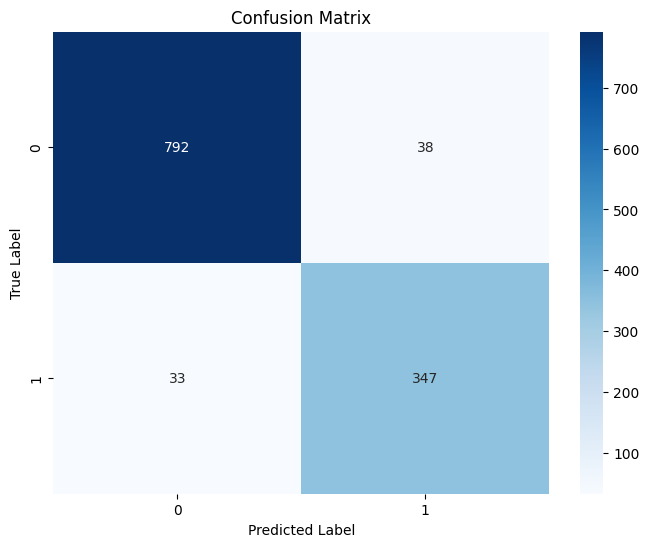

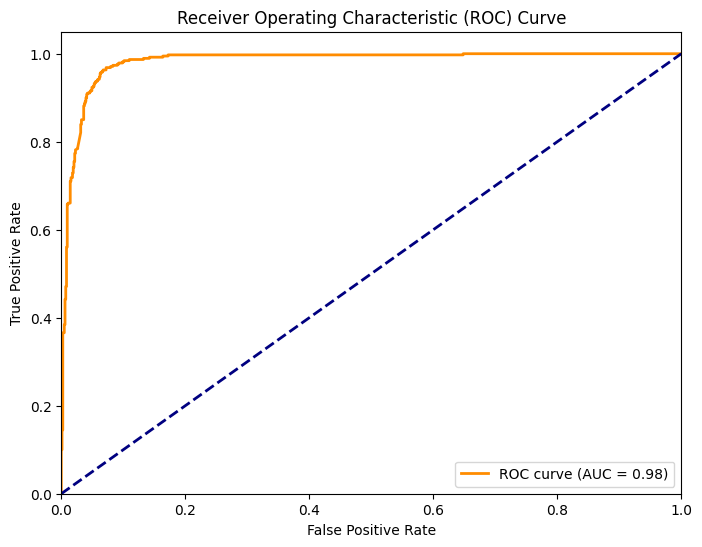

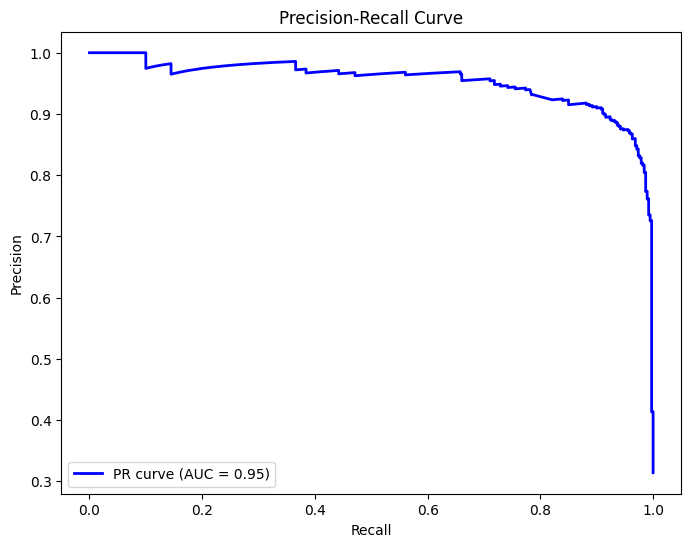


Summary Metrics:
ROC AUC: 0.982
PR AUC: 0.954


In [10]:
from utils.bilstm_evaluation import evaluate_bilstm_performance

# Run evaluation
eval_results = evaluate_bilstm_performance(model, test_df, word2idx, max_len, device)

## 2. Explainability Analysis

  0%|          | 0/5 [00:00<?, ?it/s]


Sample 1:
Text: great rates for bad credit <PHONE> get your merchant account today approved in 24 hours bad credit no credit not a problem visa mastercard american express discover electronic check click here to visi...
Model prediction: Spam (confidence: 0.999)


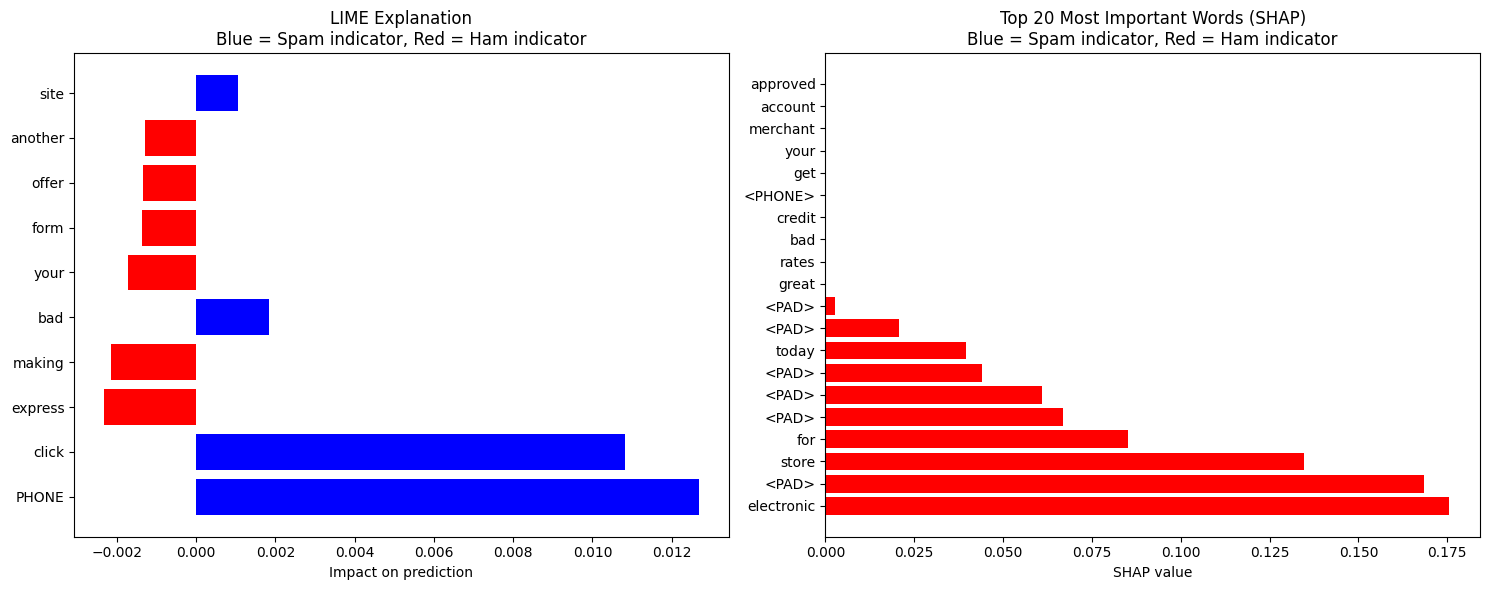


Top 5 most influential words (LIME):
- PHONE: positive impact (LIME score: 0.013)
- click: positive impact (LIME score: 0.011)
- express: negative impact (LIME score: -0.002)
- making: negative impact (LIME score: -0.002)
- bad: positive impact (LIME score: 0.002)

Top 5 most influential words (SHAP):
- electronic: positive impact (SHAP value: 0.175)
- <PAD>: positive impact (SHAP value: 0.169)
- store: positive impact (SHAP value: 0.135)
- for: positive impact (SHAP value: 0.085)
- <PAD>: positive impact (SHAP value: 0.067)

Sample 2:
Text: re hanson s sept 11 message in the national review > on thu 19 sep 2002 bill stoddard wrote > how likely are you to change someone s mind by being > rude and disrespectful to them is this how to win f...
Model prediction: Ham (confidence: 0.000)


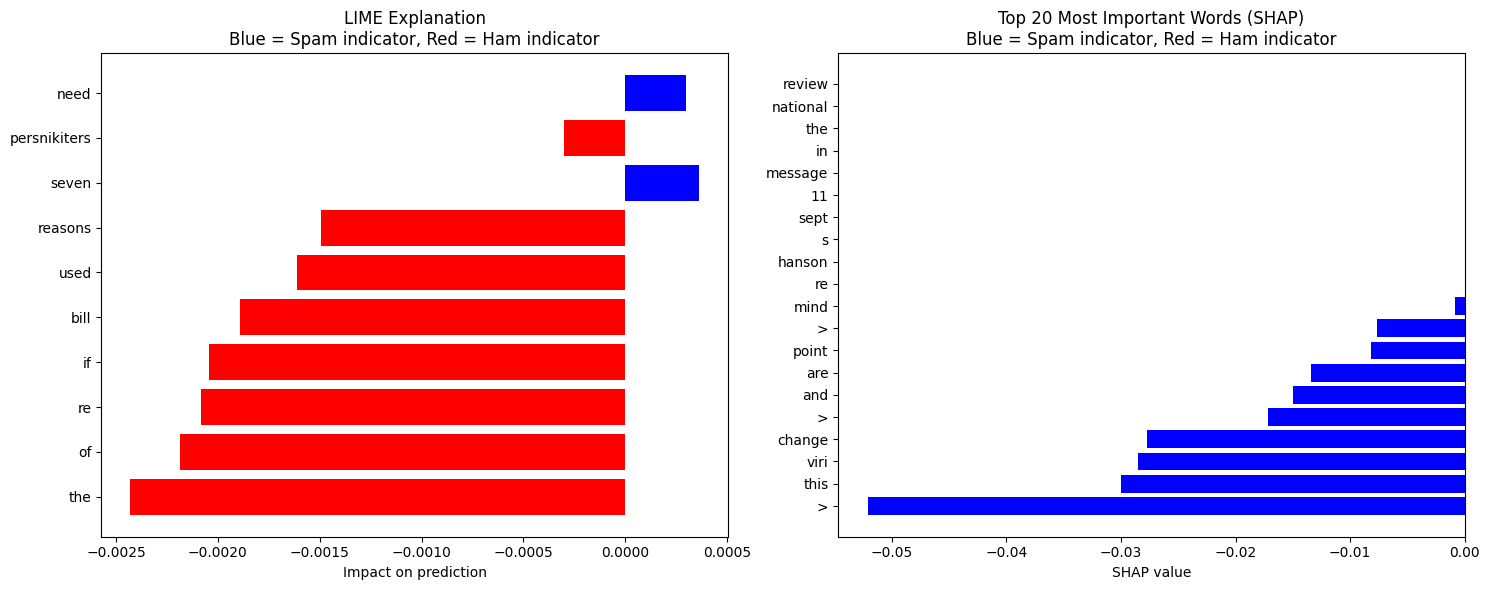


Top 5 most influential words (LIME):
- the: negative impact (LIME score: -0.002)
- of: negative impact (LIME score: -0.002)
- re: negative impact (LIME score: -0.002)
- if: negative impact (LIME score: -0.002)
- bill: negative impact (LIME score: -0.002)

Top 5 most influential words (SHAP):
- >: negative impact (SHAP value: -0.052)
- this: negative impact (SHAP value: -0.030)
- viri: negative impact (SHAP value: -0.028)
- change: negative impact (SHAP value: -0.028)
- >: negative impact (SHAP value: -0.017)

Sample 3:
Text: mr > fork > also the lifestyle of the remnants of those > societies is on average only marginally above poverty even today as i understand it there is a huge difference between native americans who sp...
Model prediction: Ham (confidence: 0.003)


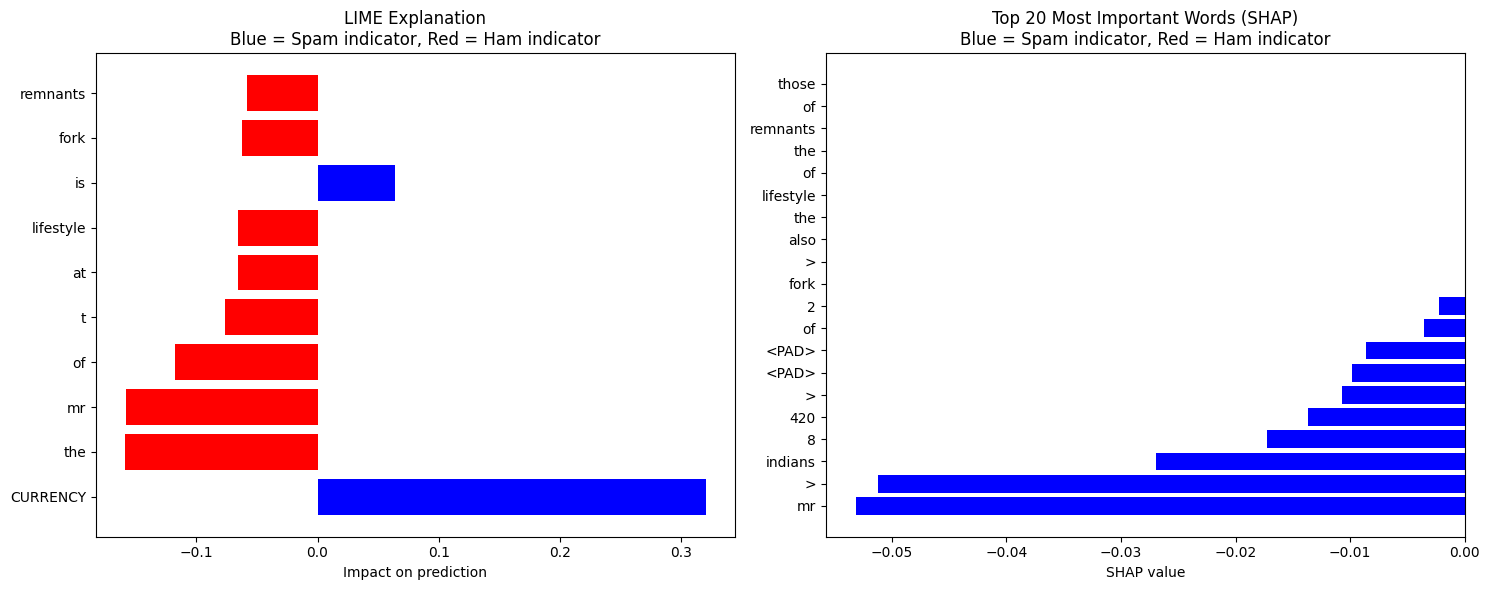


Top 5 most influential words (LIME):
- CURRENCY: positive impact (LIME score: 0.321)
- the: negative impact (LIME score: -0.159)
- mr: negative impact (LIME score: -0.158)
- of: negative impact (LIME score: -0.118)
- t: negative impact (LIME score: -0.077)

Top 5 most influential words (SHAP):
- mr: negative impact (SHAP value: -0.053)
- >: negative impact (SHAP value: -0.051)
- indians: negative impact (SHAP value: -0.027)
- 8: negative impact (SHAP value: -0.017)
- 420: negative impact (SHAP value: -0.014)

Sample 4:
Text: re whoa >>>>> j james rogers writes j> they aren t selling the software which is pretty pricy as j> it happens they are using it to optimize next generation j> wireless canopies over metro areas and f...
Model prediction: Ham (confidence: 0.000)


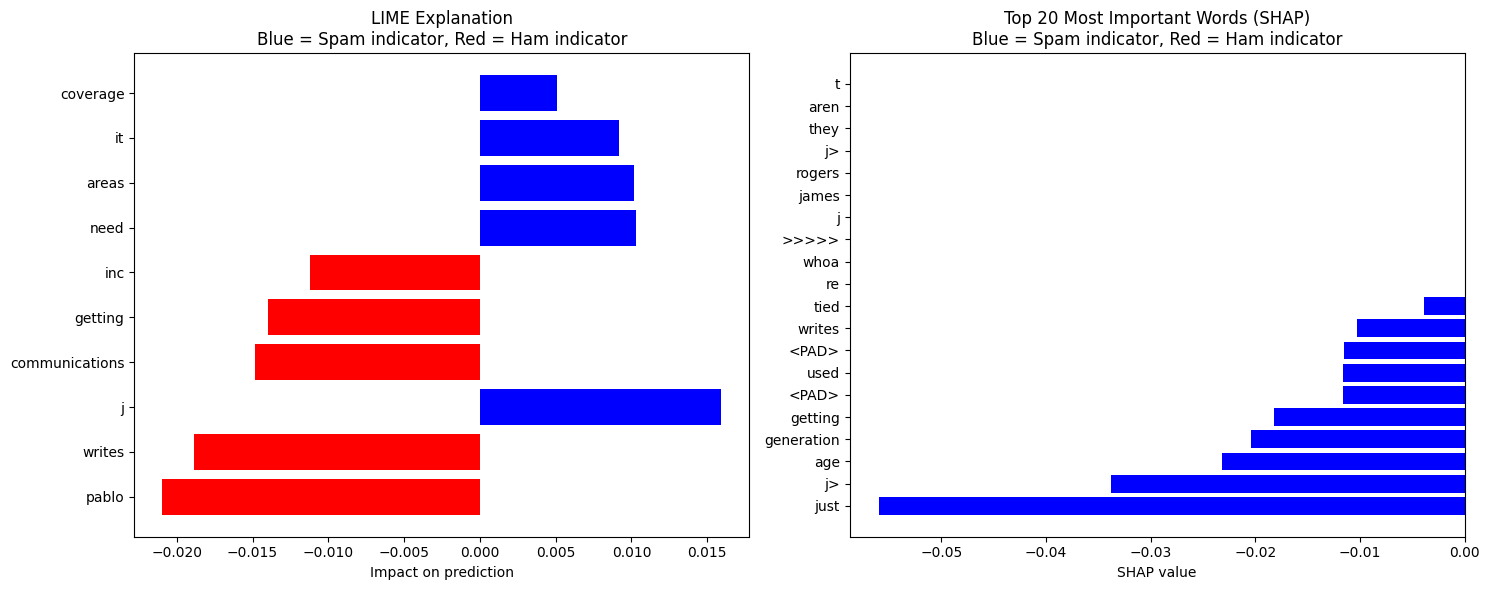


Top 5 most influential words (LIME):
- pablo: negative impact (LIME score: -0.021)
- writes: negative impact (LIME score: -0.019)
- j: positive impact (LIME score: 0.016)
- communications: negative impact (LIME score: -0.015)
- getting: negative impact (LIME score: -0.014)

Top 5 most influential words (SHAP):
- just: negative impact (SHAP value: -0.056)
- j>: negative impact (SHAP value: -0.034)
- age: negative impact (SHAP value: -0.023)
- generation: negative impact (SHAP value: -0.020)
- getting: negative impact (SHAP value: -0.018)

Sample 5:
Text: re ilug cobalt question john p looney wrote > on thu aug 08 2002 at 11 51 18am 0600 scott wunsch mentioned > >>on thu 08 aug 2002 at 11 31 01 0100 john p looney wrote >> >>> i ve installed redhat 7 3 ...
Model prediction: Ham (confidence: 0.000)


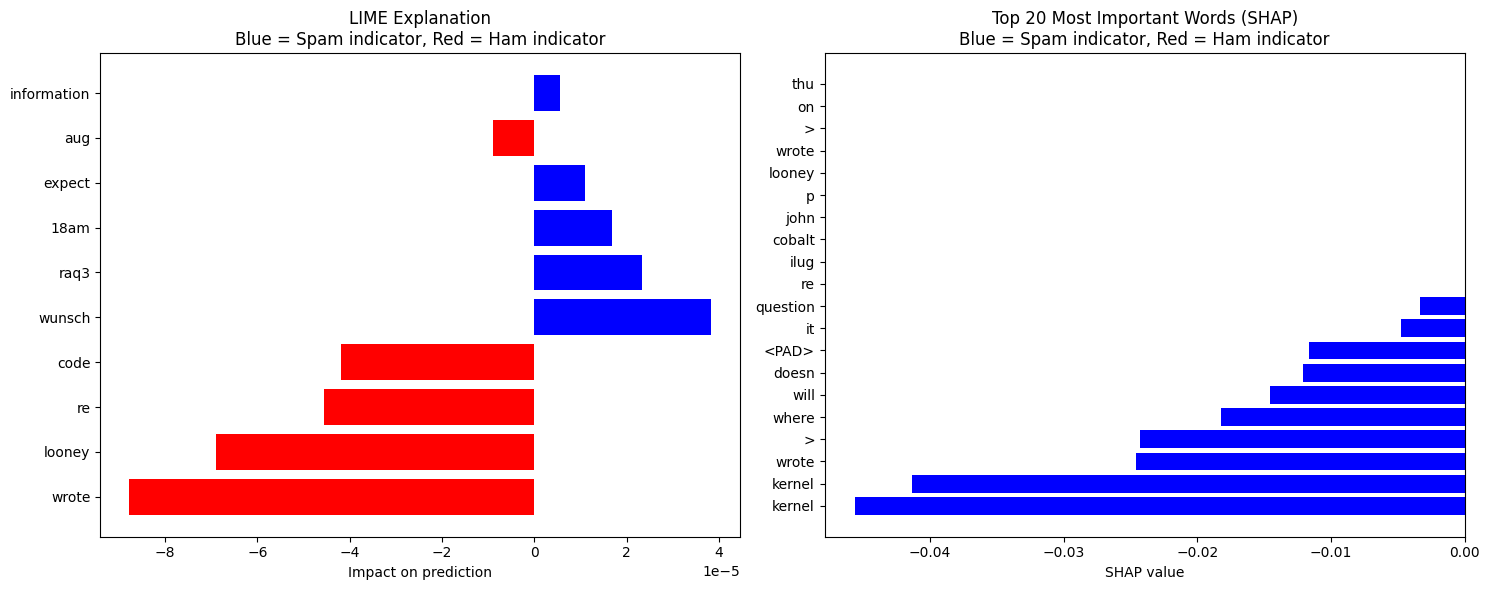


Top 5 most influential words (LIME):
- wrote: negative impact (LIME score: -0.000)
- looney: negative impact (LIME score: -0.000)
- re: negative impact (LIME score: -0.000)
- code: negative impact (LIME score: -0.000)
- wunsch: positive impact (LIME score: 0.000)

Top 5 most influential words (SHAP):
- kernel: negative impact (SHAP value: -0.046)
- kernel: negative impact (SHAP value: -0.041)
- wrote: negative impact (SHAP value: -0.025)
- >: negative impact (SHAP value: -0.024)
- where: negative impact (SHAP value: -0.018)


In [11]:
from utils.bilstm_evaluation import analyze_model_explanations

# Run explainability analysis
analyze_model_explanations(model, test_df, word2idx, max_len, device)

## 3. Adversarial Robustness Analysis


Analyzing adversarial robustness on 5 samples

Original predictions: [0. 1. 1. 1. 0.]
True labels: [0. 1. 1. 0. 0.]
Original confidence scores: [9.1149413e-05 9.9887639e-01 9.6673107e-01 8.2025975e-01 1.8328625e-05]

Testing epsilon = 0.01

Starting adversarial example generation:
Initial target labels: [1. 0. 0. 1. 1.]
Initial predictions: [1.2148509e-03 9.9487454e-01 9.6997267e-01 8.6821145e-01 4.5617289e-05]

Step 0 predictions: [[7.8500001e-05]
 [9.9834073e-01]
 [8.9448881e-01]
 [8.4675014e-01]
 [7.2262203e-08]]
Step 0 loss: -6.942408084869385

Step 5 predictions: [[1.25007655e-05]
 [9.79281306e-01]
 [8.54755580e-01]
 [7.05998182e-01]
 [1.71708525e-04]]
Step 5 loss: -5.222726345062256

Step 10 predictions: [[3.0556002e-05]
 [9.8342830e-01]
 [9.1385406e-01]
 [7.0686328e-01]
 [1.4599894e-04]]
Step 10 loss: -5.2253098487854

Step 15 predictions: [[2.0717805e-05]
 [9.9429590e-01]
 [9.4569457e-01]
 [6.5072370e-01]
 [3.0439614e-06]]
Step 15 loss: -6.399247646331787

Step 20 predictions:

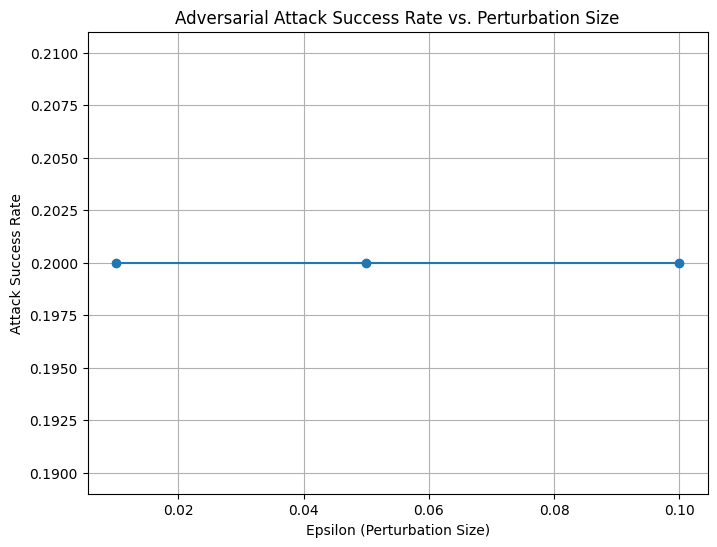


Detailed Results:

Sample 1:
Text: re hanson s sept 11 message in the national review > chuck murcko wrote > > > heh ten years ago saying the exact same words was most definitely not > > parroting the party line > > > > it was even les...
True label: Ham
Original prediction: Ham

Adversarial Results:

Sample 2:
Text: remove negative items from each credit report trw experian transunion cbi equifax communicate with the credit bureaus without fear or reprisal review your credit reports on a consistent cycle every 30...
True label: Spam
Original prediction: Spam

Adversarial Results:
- At ε=0.01: Prediction flipped to Ham
- At ε=0.05: Prediction flipped to Ham
- At ε=0.1: Prediction flipped to Ham

Sample 3:
Text: 75 reduction in road accidents
True label: Spam
Original prediction: Spam

Adversarial Results:

Sample 4:
Text: <URL>
True label: Ham
Original prediction: Spam

Adversarial Results:

Sample 5:
Text: spambayes test sets > guido > > perhaps more useful would be if tim could chec

[{'epsilon': 0.01,
  'success_rate': 0.20000000298023224,
  'original_preds': array([0., 1., 1., 1., 0.], dtype=float32),
  'adversarial_preds': array([0., 0., 1., 1., 0.], dtype=float32)},
 {'epsilon': 0.05,
  'success_rate': 0.20000000298023224,
  'original_preds': array([0., 1., 1., 1., 0.], dtype=float32),
  'adversarial_preds': array([0., 0., 1., 1., 0.], dtype=float32)},
 {'epsilon': 0.1,
  'success_rate': 0.20000000298023224,
  'original_preds': array([0., 1., 1., 1., 0.], dtype=float32),
  'adversarial_preds': array([0., 0., 1., 1., 0.], dtype=float32)}]

In [12]:
from utils.bilstm_evaluation import analyze_adversarial_robustness

# Run adversarial robustness analysis
analyze_adversarial_robustness(model, test_df, word2idx, max_len, device)